L'énergie de la bande interdite vaut :  0.8809000000000005
Bande directe ? :  False
Etiquettes des points k de la transition :  \Gamma-X
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15, 16]}), 'kpoint_index': [0, 66, 67], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f71667da1d0>, 'energy': 6.0473, 'projections': {<Spin.up: 1>: array([[0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-04, 7.200e-03, 3.540e-02],
       [1.000e-04, 7.300e-03, 3.560e-02],
       [1.000e-04, 7.200e-03, 3.530e-02],
       [2.174e-01, 6.300e-03, 3.000e-04],
       [2.156e-01, 6.300e-03, 3.000e-04],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [2.162e-01, 6.300e-03, 3.000e-04],
       [0.000e+00, 0.000e+00, 0.000e+00]])}}
{'band_index': defaultdict(<class 'list'>, {<Spin.up: 1>: [17]}), 'kpoint_index': [21, 22, 148], 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint object at 0x7f717c0ca438>, 'energy': 6.9282, 'projections': {<Spin.up: 1>: array([[

IndexError: list assignment index out of range

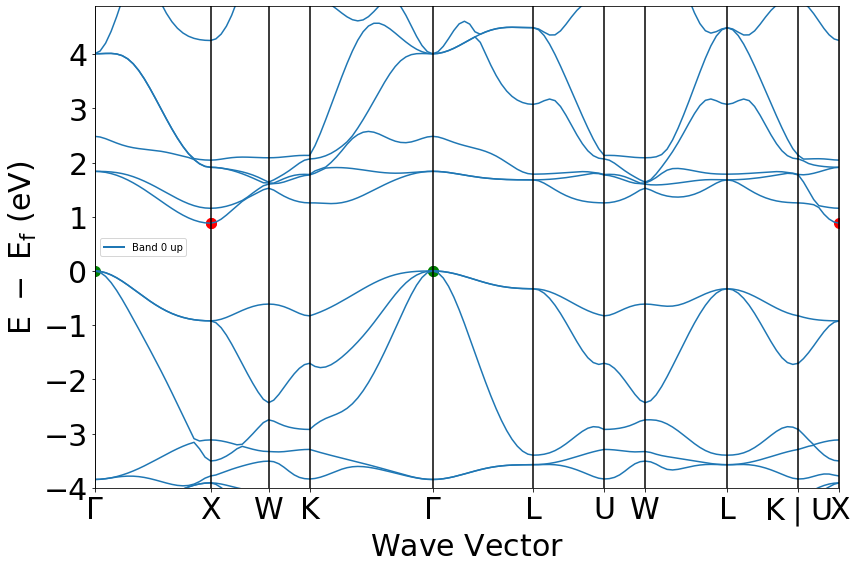

In [32]:
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
with MPRester("OrxTdTdienuaKM79RmZ") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1008680")
    bandes = m.get_bandstructure_by_material_id("mp-1008680")
    
#On cherche la bande correspondante
import pymatgen.electronic_structure
from pymatgen.electronic_structure.plotter import BSPlotter

bandesbis = bandes.get_band_gap()
print("L'énergie de la bande interdite vaut : ", bandesbis["energy"])
print("Bande directe ? : ", bandesbis["direct"])
print("Etiquettes des points k de la transition : ", bandesbis["transition"])



#On obtient le graphique : 
graph = BSPlotter(bandes)
graph.get_plot(vbm_cbm_marker = True)
data = graph.bs_plot_data()
dist = data.get("ticks").get("distance")

#on constate qu'il y a des valeurs identiques dans dist, on crée alors un array similaire en conservant les valeurs uniques
import numpy as np
newdist = [dist[0], dist[1], dist[3], dist[5], dist[7],dist[9],dist[11], dist[13], dist[15],dist[17], dist[18]]

d0 = newdist[1]-newdist[0]
d1 = newdist[2]-newdist[1]
d2 = newdist[3]-newdist[2]
d3 = newdist[4]-newdist[3]
d4 = newdist[5]-newdist[4]
d5 = newdist[6]-newdist[5]
d6 = newdist[7]-newdist[6]
d7 = newdist[8]-newdist[7]
d8 = newdist[9]-newdist[8]
d9 = newdist[10]-newdist[9]

d = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]

energie = data.get('energy')

# Valence Band Maximums (VBM)
VBM = bandes.get_vbm()
print(VBM)
vbmlist= []

# Conduction Band Minimums (CBM) 
CBM = bandes.get_cbm()
print(CBM)
cbmlist = []

cbm = CBM["band_index"].items()
vbm = VBM["band_index"].items()
for index in cbm:
    cbmlist.append(index[1][0])
for cursor in vbm:
    vbmlist.append(index[1][0])
    
nbrevbm = vbmlist[-1]
nbrecbm = cbmlist[0]
print(nbrevbm)
print(nbrecbm)

energc = []
energv = []

for i in range(9):
    energv[i] =energie.get('1')[i][nbrevbm][-1] - energie.get('1')[i][nbrevbm][0]
    energc[i] =energie.get('1')[i][nbrecbm][-1] - energie.get('1')[i][nbrecbm][0]

    
for i in range (9):
    pentec[i] = energc[i]/d[i]
    pentev[i] = energv[i]/d[i] 


#masse effective
mxV = np.max(abs(pentev))
mxC = np.max(abs(pentec))
mnC = np.min(abs(pentec))
mnV = np.min(abs(pentev))

